In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
import ipywidgets as widgets
from IPython.display import display,clear_output
from mpl_toolkits import mplot3d

### Helper script ###
import displays

### Goal is to explore the simulations from Hope, & Bowman, BRAIN, 2019 on the dubiousness of the proportional recovery rule, and understand the stats behind it. 

The first claim is that the correlation between baseline (X), and outcomes (Y), is often not strong, but that many studies report the correlation between basline (X) and recovery (Y-X)

Run interactive display -- see how statistics of X vs. Y affect findings of 'proportional recovery'

X and Y are randomly generated with a specific ratio of Y to X variance (influence with log_var_y), and a mean offset (influence with offs_y)

Left plots show Baseline vs. Outcome for individual "patients", and Baseline vs. Recovery (Outcome-Baseline). Right plots show correlation b/w Baseline and Outcome and correlation b/w Baseline and Recovery. Gray line shows line corresponding to Recovery = - X 


In [49]:
### Run interactive display 
### click 'Run Interact' to run the plot 
### Adjust the toggles to affect the variance and offset of y 

box = displays.interative_viewer_plot()
box.assemble_box()
display(box.box)

## Reproduce figure 2 from Bowman paper

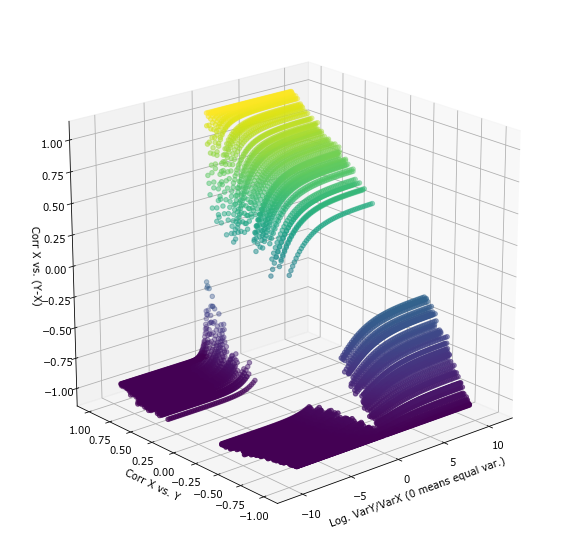

In [50]:
#### Plot out the relationship between 
####   1.  correlations b/w X and Y,
####   2.  correlations between X and (Y-X), 
####   3.  and varY/varX ratio
#### in 3D space. 

N = 100
X = np.random.randn(N)

cor = np.linspace(-1, 1, 100)
var = np.linspace(-2, 2, 100)

CORR_XY = []
CORR_X_dY = []
VAR_RATIO = []

for i_c, cor_y in enumerate(cor):
    
    ## Make it so Y has random noise to disrupt correlation
    if cor_y > 0: 
        Y = X + 2*np.random.randn(N)*(1 - cor_y)
    elif cor_y < 0: 
        Y = -X + 2*np.random.randn(N)*(1 + cor_y)
    elif cor_y == 0: 
        Y = 2*np.random.randn(N)
        
    ### Now make sure variance ratios are swept 
    for i_r, var_ratio in enumerate(var):
        varY = np.var(Y)
        varX = np.var(X)
        var_ratio_log = 10**var_ratio
        Y = Y*var_ratio_log/(varY/varX)
        
        ### Collect the data 
        _,_,rv,_,_ = scipy.stats.linregress(X, Y)
        CORR_XY.append(rv)
        
        _,_,rv,_,_ = scipy.stats.linregress(X, Y-X)
        CORR_X_dY.append(rv)
        
        VAR_RATIO.append(np.var(Y)/np.var(X))
        
### Plot the data 
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter(np.log(VAR_RATIO), CORR_XY, CORR_X_dY, c=CORR_X_dY)
ax.set_xlabel('Log. VarY/VarX (0 means equal var.)')
ax.set_ylabel('Corr X vs. Y')
ax.set_zlabel('Corr X vs. (Y-X)')
ax.view_init(elev=21., azim=-131)


### Regimes of Fig 2. (above) #####

###### Low varY/VarX
Correlations between X vs. (Y-X) approximates to X vs. -X because variance of Y is so much smaller than variance of X, so correlation values betwen X and Y-X are close to -1 (dark blue plateau region)
    
###### High varY/VarX
For very high varY/VarX, X vs. (Y-X) approximates to X vs. Y because the variance of Y is so much greater than the variance of X, so Y-X ~= Y. Thus, correlation values between X and Y-X approximate Corr X vs. Y, hence the slope of Corr X vs. (Y-X) ~= Corr X vs. Y when Log. VarY/VarX is very high

### So is recovery proportional or not ? #####
What would we expect proportional recovery look like? Let's simulate proportional recovery and plot what it should look like. Also let's see what varY/varX looks: 

Run interactive plot with data generated according to the proportional recovery rule Y = X + 0.7*(66 - X). 

See how changing the ceiling affects this plot (note that increasing the ceiling allows for more variance in Y, keeping the ceiling low, constrains Y's variance). 

Also see how shuffled data (bottom row) recapitulates the spurious correlation in the (Y-X) vs. X plot, but not in the Y vs. X plot

In [52]:
box = displays.interative_viewer_plot_PRR()
box.assemble_box()
display(box.box)

Thus, in order for recovery to be assessed as proportional, you should still find a correlation between Baseline and outcome (slope = 1 - percent recovered). We can also make sure proportional recovery is "real" by comparing the correlatiosn to shuffled data just to ensure var(X) is not dominating the Y-X variable.